In [1]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
%matplotlib inline
import numpy as np
import pandas as pd
#import seaborn as sns
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from os import system
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve, auc
import random
import sklearn.ensemble as ske
from sklearn import grid_search
from sklearn.feature_extraction import DictVectorizer as DV
from matplotlib import ticker
import pickle
from time import time
from sklearn.metrics import confusion_matrix
from scipy.stats import randint as sp_randint

/Users/raajaa/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/raajaa/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Data Loading 

In [2]:
result = pd.read_csv("data/Test_Financial_Data.csv")

In [3]:
to_drop = ['customer_id','city','delivery_state']
result = result.drop(to_drop,axis=1)

In [4]:
result = result.astype(int)

In [5]:
result=result.rename(columns = {'num_unique_pdts_last_month':'unique_pdts_lst_month','num_unique_pdts_last_3months':'unique_pdts_lst_3months','num_unique_pdts_last_6months':'unique_pdts_lst_6months','pdts_rec_purchased_last_month':'pdts_rec_purchd_lst_months','pdts_rec_purchased_last_3months':'pdts_rec_purchd_lst_3months','pdts_rec_purchased_last_6months':'pdts_rec_purchd_lst_6months'})

In [6]:
len(result)

200000

### Exploratory Data Analysis 

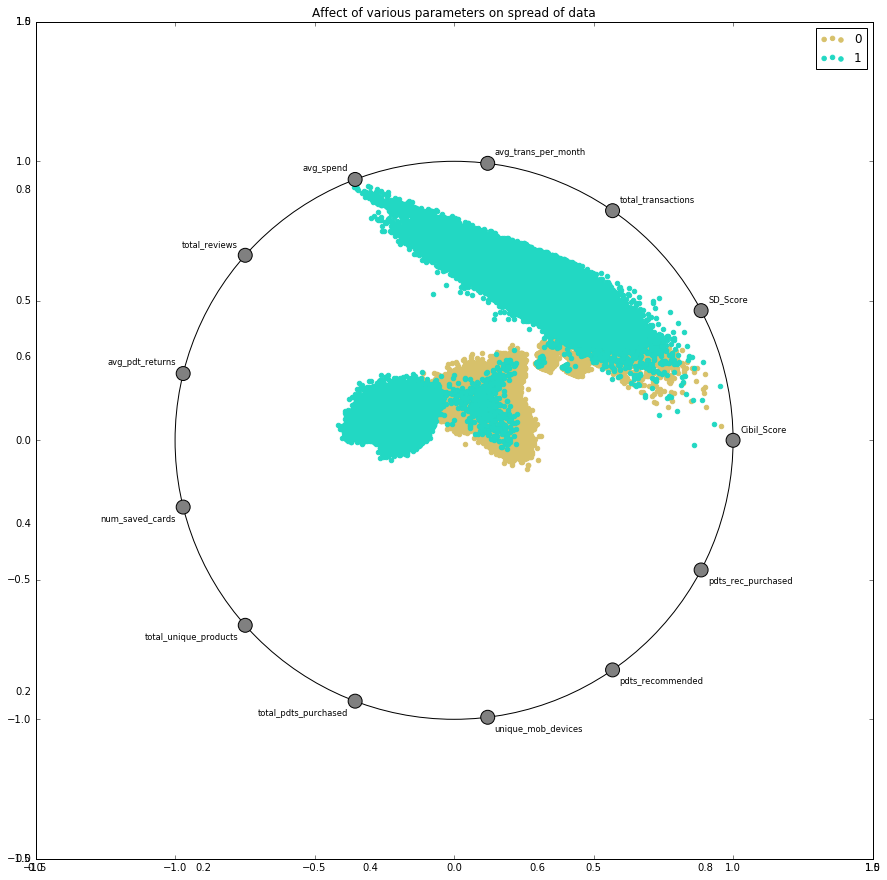

In [7]:
from pandas.tools.plotting import radviz
plt.figure(figsize=(15,15))
plt.title("Affect of various parameters on spread of data")
to_have = ['Default_Flag','Cibil_Score','SD_Score','total_transactions','avg_trans_per_month','avg_spend','total_reviews','avg_pdt_returns','num_saved_cards','total_unique_products','total_pdts_purchased','unique_mob_devices','pdts_recommended','pdts_rec_purchased']
df = result[to_have]
radviz(df, 'Default_Flag')

In [8]:
data = result
def interactive_chart(features):
    f= features
    if f=="city_count": pd.crosstab(data.city_count, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=="city": pd.crosstab(data.city, data.Default_Flag.astype(int)).plot(kind='barh',grid= True,figsize=(15,30))
    elif f=="delivery_state": pd.crosstab(data.delivery_state, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=="delivery_state_count": pd.crosstab(data.delivery_state_count, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=="total_transactions": pd.crosstab(data.total_transactions, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=="avg_trans_per_month": pd.crosstab(data.avg_trans_per_month, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=="num_trans_last_6months": pd.crosstab(data.num_trans_last_6months, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=='avg_spend': pd.crosstab(data.avg_spend, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=='total_spend': pd.crosstab(data.total_spend, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=='avg_pdt_returns': pd.crosstab(data.avg_pdt_returns, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=='num_saved_cards': pd.crosstab(data.num_saved_cards, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=='wallet_flag': pd.crosstab(data.wallet_flag, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=='gift_card_flag': pd.crosstab(data.gift_card_flag, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=='total_unique_products': pd.crosstab(data.total_unique_products, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=='total_pdts_purchased': pd.crosstab(data.total_pdts_purchased, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=='num_gc_trans': pd.crosstab(data.num_gc_trans, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=='avg_value_gift_card': pd.crosstab(data.avg_value_gift_card, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=='total_value_gift_card': pd.crosstab(data.total_value_gift_card, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=='unique_mob_devices': pd.crosstab(data.unique_mob_devices, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=='pdts_recommended': pd.crosstab(data.pdts_recommended, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))
    elif f=='pdts_rec_purchased': pd.crosstab(data.pdts_rec_purchased, data.Default_Flag.astype(int)).plot(kind='bar',grid= True,figsize=(20,15))

<function __main__.interactive_chart>

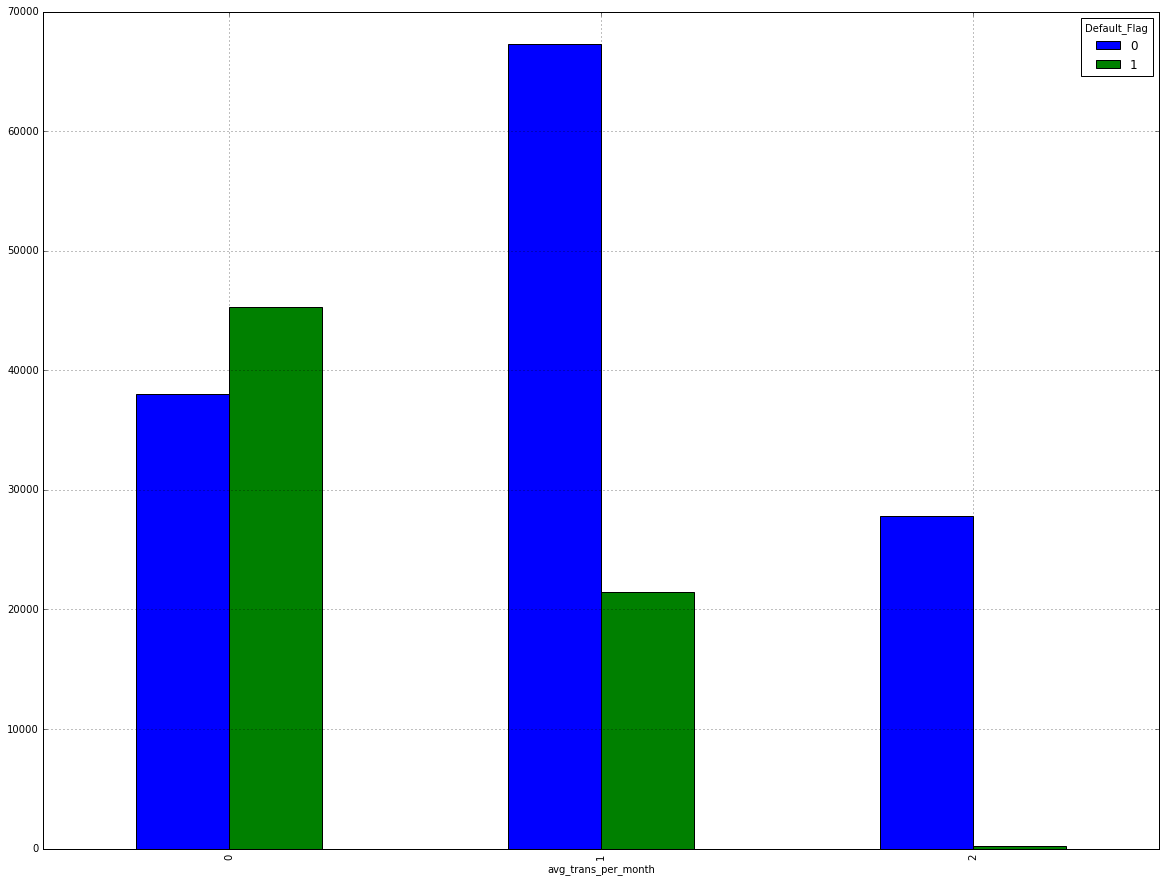

In [9]:
from IPython.html.widgets import *
interact(interactive_chart, features=["avg_trans_per_month","city_count","delivery_state_count","total_transactions",'num_trans_last_6months','avg_spend','total_spend','avg_pdt_returns','num_saved_cards','wallet_flag','gift_card_flag','total_unique_products','total_pdts_purchased','num_gc_trans','avg_value_gift_card','total_value_gift_card','unique_mob_devices','pdts_recommended','pdts_rec_purchased'])

In [10]:
from scipy import stats
def interactive_chart(Features):
    plt.title("Gaussian Kernel Distribution")
    plt.legend(('Live', 'Turn Down'),loc='best') 
    
    
    if Features == "total_transactions": 
        density = stats.kde.gaussian_kde(data.total_transactions)#[df.status == 1])
        min = pd.DataFrame.min(data)['total_transactions']
        max = pd.DataFrame.max(data)['total_transactions']
        #fig=plt.figure(figsize=(20,10))
        x = np.linspace(min, max, 300)
        plt.plot(x, density(x))
        plt.xlabel("total_transactions")
    
    elif Features == "total_spend": 
        density = stats.kde.gaussian_kde(data.total_spend)#[df.status == 1])
        min = pd.DataFrame.min(data)['total_spend']
        max = pd.DataFrame.max(data)['total_spend']
        x = np.linspace(min, max, 200)
        plt.plot(x, density(x))
        plt.xlabel("total_transactions")    

<function __main__.interactive_chart>

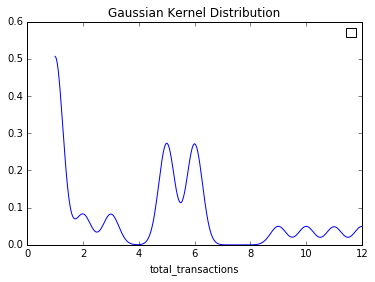

In [11]:
from IPython.html.widgets import *
interact(interactive_chart, Features=["total_transactions","total_spend"])

### Extract Default and Non - Defaulters Set 

In [12]:
keys_non = np.array([0])
keys_def = np.array([1])
non_def = result[result.Default_Flag.isin(keys_non)]
defaulters = result[result.Default_Flag.isin(keys_def)]

### Outlier Detection on Defaulters and Non-Defaulters 

In [29]:
## DANGER - DONT Re-RUN ; Use Pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

# fit the model on Training Data
clf_outlier_defaulters = svm.OneClassSVM(nu=0.1,kernel="linear", gamma=0.1,cache_size=3000)
clf_outlier_defaulters.fit(defaulters)
print "done"

done


In [30]:
## DANGER - DONT Re-RUN ; Use Pickle
one_svm_defaults = open('data/one_svm_defaults.pickle', 'wb')

# Pickle the list using the highest protocol available.
pickle.dump(clf_outlier_defaulters, one_svm_defaults, -1) ###

one_svm_defaults.close()

In [13]:
pkl_file_defaults = open('data/one_svm_defaults.pickle', 'rb')
clf_outlier_defaulters = pickle.load(pkl_file_defaults)
y_pred_outliers_defaulters = clf_outlier_defaulters.predict(defaulters)
n_outliers_defaulters = y_pred_outliers_defaulters[y_pred_outliers_defaulters == -1].size
print " Total Outliers: %d/%d" %(n_outliers_defaulters,defaulters.shape[0])

 Total Outliers: 6694/66933


In [14]:
ind_data_default_outlier = np.where(y_pred_outliers_defaulters == -1)
default_outliers = defaulters.iloc[ind_data_default_outlier[0]]

In [15]:
a = default_outliers.index

In [34]:
## DANGER - DONT Re-RUN ; Use Pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

# fit the model on Training Data
clf_outlier_nonDF = svm.OneClassSVM(nu=0.1,kernel="linear", gamma=0.1,cache_size=3000)
clf_outlier_nonDF.fit(non_def)
print "done"

done


In [35]:
## DANGER - DONT Re-RUN ; Use Pickle
one_svm_nonDF = open('data/one_svm_nonDF.pickle', 'wb')

# Pickle the list using the highest protocol available.
pickle.dump(clf_outlier_nonDF, one_svm_nonDF, -1) ###

one_svm_nonDF.close()

In [16]:
pkl_file_nonDF = open('data/one_svm_nonDF.pickle', 'rb')
clf_outlier_nonDF = pickle.load(pkl_file_nonDF)
y_pred_outliers_nonDF = clf_outlier_nonDF.predict(non_def)
n_outliers_nonDF = y_pred_outliers_nonDF[y_pred_outliers_nonDF == -1].size
print " Total Outliers: %d/%d" %(n_outliers_nonDF,non_def.shape[0])

 Total Outliers: 13307/133067


In [17]:
ind_data_nonDF_outlier = np.where(y_pred_outliers_nonDF == -1)
nonDF_outliers = non_def.iloc[ind_data_nonDF_outlier[0]]

In [18]:
b = nonDF_outliers.index

### Outlier Removal 

In [19]:
import pickle

# Detect Outliers in Training set
ind_outlier = np.concatenate([a,b])
data_temp = result

data_clean = data_temp.drop(data_temp.index[ind_outlier])

print "(Original Data - Outliers):", len(data_clean)

# Extract data for SOM training
data_som = data_clean

# Convert individual sets for projection
data_som.to_csv('data/ecomm_data_clean.csv',sep=",")

# Pickle the Clear Training data ( Outlier Removed) for SOM modeling

output_train = open('data/train_som.pickle', 'wb')

# Pickle the list using the highest protocol available.
pickle.dump(data_som, output_train, -1) ###

output_train.close()

(Original Data - Outliers): 179999


In [20]:
outliers = result.iloc[ind_outlier]

In [21]:
import pickle
pkl_file = open('data/train_som.pickle', 'rb')

data_clean = pickle.load(pkl_file)

### Self Organizing Map 

In [22]:
import sompy as SOM
#This is your selected map size 
msz0 = 4
msz1 = 4
sm = SOM.SOM('sm', data_clean.as_matrix(), mapsize = [msz0, msz1],norm_method = 'var',initmethod='pca')
sm.train(n_job = 1, shared_memory = 'no',verbose='final')


Total time elapsed: 1.454000 secodns
final quantization error: 5.203825


/Users/raajaa/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


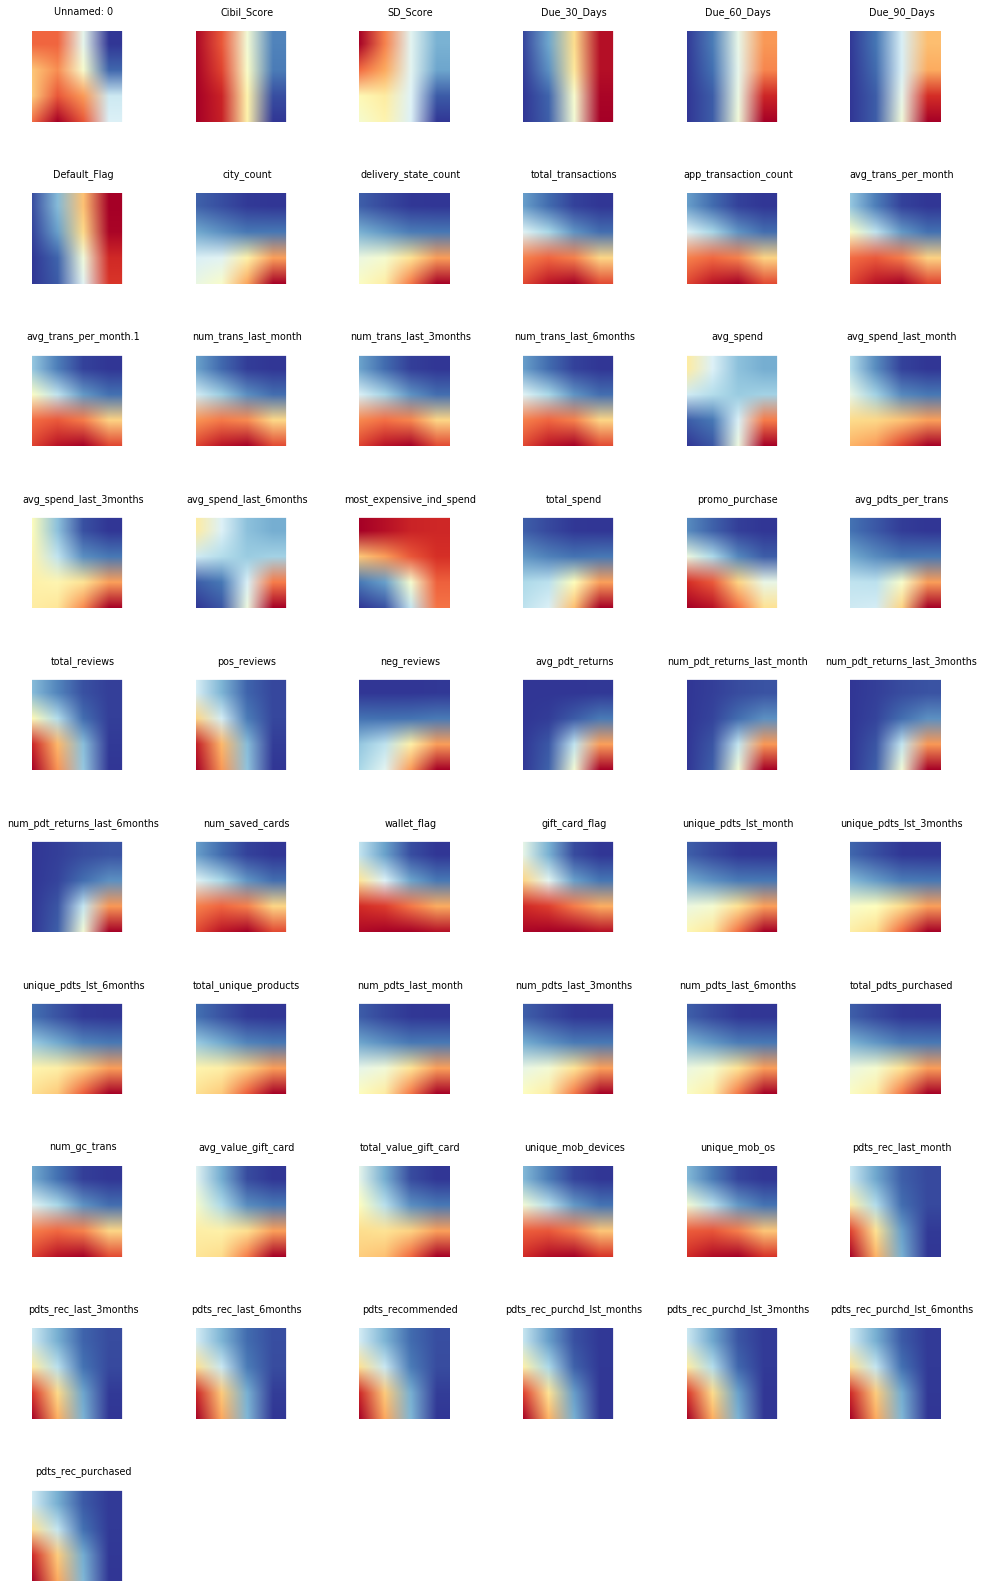

In [23]:
import numpy as np
header = data_clean.columns
header=np.array(header)
header = header[np.newaxis,:]
setattr(sm, 'compname', header)
sm.view_map(text_size=8)
plt.subplots_adjust( bottom=0.2, top=1.0, wspace=0.6,hspace=0.3)

### Train - Test Data split 

In [24]:
#Extract Dependent Variable
y = data_clean['Default_Flag']
dfTEMP = data_clean

to_drop = ['Cibil_Score','SD_Score','Due_30_Days','Due_60_Days','Due_90_Days','Default_Flag','delivery_state_count']
dfTEMP = dfTEMP.drop(to_drop,axis=1)

# Split the dataset as Train - Test
X_train, X_test, y_train, y_test = train_test_split(dfTEMP, y, test_size=0.3, random_state=10)
print "done"

done


In [25]:
data_clean.head(10).ix[:,4:]

,Due_60_Days,Due_90_Days,Default_Flag,city_count,delivery_state_count,total_transactions,app_transaction_count,avg_trans_per_month,avg_trans_per_month.1,num_trans_last_month,...,unique_mob_devices,unique_mob_os,pdts_rec_last_month,pdts_rec_last_3months,pdts_rec_last_6months,pdts_recommended,pdts_rec_purchd_lst_months,pdts_rec_purchd_lst_3months,pdts_rec_purchd_lst_6months,pdts_rec_purchased
19813,0,0,1,1,1,1,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
19817,2,4,1,8,43,6,2,1,1,0,...,4,5,0,0,0,0,0,0,0,0
19819,5,5,1,1,1,1,0,0,0,0,...,1,1,0,1,1,1,0,0,0,0
19820,0,0,1,1,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
19822,5,5,1,13,40,6,1,1,1,1,...,4,3,0,0,0,0,0,0,0,0
19829,0,0,1,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
19836,0,0,1,1,1,1,0,0,0,0,...,1,1,0,0,1,1,0,0,1,1
19838,0,0,1,1,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
19847,0,0,1,1,1,1,1,0,0,0,...,1,1,0,1,1,1,0,1,1,1
19856,4,5,1,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [26]:
asd=data_clean.reindex_axis(sorted(data_clean.columns), axis=1)

In [27]:
asd.head()

,Cibil_Score,Default_Flag,Due_30_Days,Due_60_Days,Due_90_Days,SD_Score,Unnamed: 0,app_transaction_count,avg_pdt_returns,avg_pdts_per_trans,...,total_spend,total_transactions,total_unique_products,total_value_gift_card,unique_mob_devices,unique_mob_os,unique_pdts_lst_3months,unique_pdts_lst_6months,unique_pdts_lst_month,wallet_flag
19813,749,1,1,0,0,527,19813,0,0,1,...,18,1,1,18,1,1,0,1,0,0
19817,427,1,3,2,4,334,19817,2,7,7,...,733,6,31,21,4,5,13,31,0,1
19819,444,1,5,5,5,645,19819,0,0,1,...,16,1,1,0,1,1,1,1,0,0
19820,716,1,1,0,0,716,19820,0,0,1,...,18,1,1,0,1,1,1,1,0,0
19822,429,1,3,5,5,291,19822,1,7,6,...,692,6,26,21,4,3,11,26,7,1


In [28]:
#Extract Dependent Variable
y = asd['Default_Flag']
dfTEMP = asd

to_drop = ['Cibil_Score','SD_Score','Due_30_Days','Due_60_Days','Due_90_Days','Default_Flag','delivery_state_count']
dfTEMP = dfTEMP.drop(to_drop,axis=1)

# Split the dataset as Train - Test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(dfTEMP, y, test_size=0.3, random_state=10)
print "done"

done


In [29]:
X_train_2

,Unnamed: 0,app_transaction_count,avg_pdt_returns,avg_pdts_per_trans,avg_spend,avg_spend_last_3months,avg_spend_last_6months,avg_spend_last_month,avg_trans_per_month,avg_trans_per_month.1,...,total_spend,total_transactions,total_unique_products,total_value_gift_card,unique_mob_devices,unique_mob_os,unique_pdts_lst_3months,unique_pdts_lst_6months,unique_pdts_lst_month,wallet_flag
185849,185849,0,0,7,20,21,20,0,1,1,...,622,5,21,21,5,4,12,21,0,1
35772,35772,0,0,1,15,18,15,0,0,0,...,18,1,1,0,1,1,1,1,0,0
51045,51045,2,0,2,13,15,13,13,1,1,...,195,6,12,14,5,5,9,12,3,1
55977,55977,4,0,3,13,14,13,0,1,1,...,206,6,13,13,5,5,5,13,0,1
44492,44492,0,0,1,16,0,16,0,1,1,...,51,3,3,16,3,3,0,3,0,1
183227,183227,4,0,3,13,15,13,14,1,1,...,216,5,16,13,3,4,13,16,5,1
114895,114895,1,0,1,10,0,10,0,0,0,...,13,1,1,13,1,1,0,1,0,0
101439,101439,5,0,9,21,23,21,0,1,1,...,953,6,35,21,4,4,25,35,0,1
156181,156181,2,0,4,13,15,13,14,1,1,...,271,6,20,0,4,5,7,20,4,1
133439,133439,1,0,1,15,17,15,17,0,0,...,33,2,2,0,2,2,1,2,1,1


In [30]:
# Capture the results accross models
cols = ['model','precision','recall','f1']
resultsDF = pd.DataFrame(columns=cols)

#### Hyperparameter Optimization Reporting Function

In [31]:
import numpy as np

from time import time
from operator import itemgetter
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

## Machine Learning - Modeling 

### Classifier 1

In [27]:
%%time

logitRG = LogisticRegression(penalty='l2')
param_dist = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
n_iter_search = 7
random_search = grid_search.RandomizedSearchCV(logitRG, param_distributions=param_dist,
                                   n_iter=n_iter_search)
modelLOGIT = random_search.fit(X_train, y_train)
report(modelLOGIT.grid_scores_)

Model with rank: 1
Mean validation score: 0.894 (std: 0.003)
Parameters: {'C': 0.01}

Model with rank: 2
Mean validation score: 0.894 (std: 0.003)
Parameters: {'C': 0.1}

Model with rank: 3
Mean validation score: 0.894 (std: 0.003)
Parameters: {'C': 10}

CPU times: user 44 s, sys: 3.57 s, total: 47.5 s
Wall time: 51 s


In [28]:
modelLogit = LogisticRegression(**modelLOGIT.best_params_)
modelLogit.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
## DANGER - DONT Re-RUN ; Use Pickle
logit_hyper_opt = open('data/logit_hyper_opt.pickle', 'wb')

# Pickle the list using the highest protocol available.
pickle.dump(modelLOGIT, logit_hyper_opt, -1) ###

logit_hyper_opt.close()

In [32]:
import pickle
pkl_file_logit = open('data/logit_hyper_opt.pickle', 'rb')
gridLOGIT = pickle.load(pkl_file_logit)
pkl_file_logit.close()

In [33]:
modelLogit=gridLOGIT

In [34]:
predictedLogit = modelLogit.predict(X_test)
probsLogit = modelLogit.predict_proba(X_test)

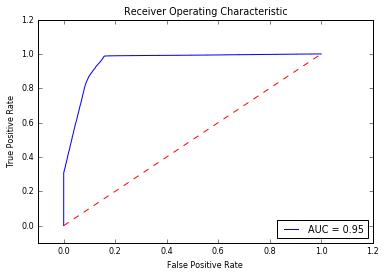

AUC: 0.952275188339


In [35]:
# generate evaluation metrics
Logit_Acc = metrics.accuracy_score(y_test, predictedLogit)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probsLogit[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print "AUC:", metrics.roc_auc_score(y_test, probsLogit[:, 1])

In [36]:
precLogit = metrics.average_precision_score(y_test, predictedLogit)
recallLogit = metrics.recall_score(y_test, predictedLogit)
f1Logit = metrics.f1_score(y_test, predictedLogit)
Logit_Acc = metrics.accuracy_score(y_test, predictedLogit)
accLogit = metrics.accuracy_score(y_test, predictedLogit)

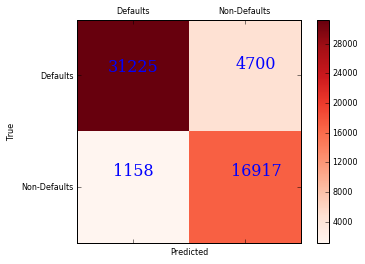

In [37]:
labels = ['Defaults', 'Non-Defaults']
cm = confusion_matrix(y_test, predictedLogit)
#print pd.DataFrame(cm, index=['Defaults','Non-Defaults'],columns=['Defaults','Non-Defaults'])
print("\n")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False, which='both')
cax = ax.matshow(cm,cmap=plt.cm.Reds)
plt.colorbar(cax)
font = {'family' : 'serif',
        'color'  : 'blue',
        'weight' : 'normal',
        'size'   : 16,
        }
plt.text(0.25, 0.79,cm[0][0], ha='center', va='center', transform=ax.transAxes,fontdict=font)
plt.text(0.8, 0.8,cm[0][1], ha='center', va='center', transform=ax.transAxes,fontdict=font)
plt.text(0.25, 0.32,cm[1][0], ha='center', va='center', transform=ax.transAxes,fontdict=font)
plt.text(0.8 ,0.32,cm[1][1], ha='center', va='center', transform=ax.transAxes,fontdict=font)
ax.set_xticklabels([' '] + labels)
ax.set_yticklabels([' '] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [38]:
resultsDF = resultsDF.append({'model': 'Classifier 1', 'accuracy': accLogit, 'precision': precLogit , 'recall': recallLogit, 'f1':f1Logit}, ignore_index=True)

### Classifier 2

#### Hyperparameter Optimization - Using Randomized Search 

In [37]:
%%time
from scipy.stats import randint as sp_randint
clf_rf = ske.RandomForestClassifier(n_estimators=20)
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
n_iter_search = 20
random_search = grid_search.RandomizedSearchCV(clf_rf, param_distributions=param_dist,
                                   n_iter=n_iter_search)
modelRF = random_search.fit(X_train, y_train)
report(random_search.grid_scores_)

Model with rank: 1
Mean validation score: 0.904 (std: 0.001)
Parameters: {'bootstrap': True, 'min_samples_leaf': 10, 'min_samples_split': 6, 'criterion': 'gini', 'max_features': 7, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.904 (std: 0.001)
Parameters: {'bootstrap': True, 'min_samples_leaf': 8, 'min_samples_split': 5, 'criterion': 'entropy', 'max_features': 10, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.903 (std: 0.002)
Parameters: {'bootstrap': True, 'min_samples_leaf': 8, 'min_samples_split': 7, 'criterion': 'entropy', 'max_features': 1, 'max_depth': None}

CPU times: user 3min 6s, sys: 7.74 s, total: 3min 14s
Wall time: 3min 43s


In [38]:
%%time
#instantiate and fit our model

modelRF = ske.RandomForestClassifier(**modelRF.best_params_).fit(X_train, y_train)


CPU times: user 3.13 s, sys: 56.2 ms, total: 3.19 s
Wall time: 3.42 s


In [41]:
## DANGER - DONT Re-RUN ; Use Pickle
rf_hyper_opt = open('data/rf_hyper_opt.pickle', 'wb')

# Pickle the list using the highest protocol available.
pickle.dump(modelRF, rf_hyper_opt, -1) ###

rf_hyper_opt.close()

In [39]:
pkl_file_rf = open('data/rf_hyper_opt.pickle', 'rb')
modelRF = pickle.load(pkl_file_rf)
pkl_file_rf.close()

In [40]:
predictedRF = modelRF.predict(X_test)

In [41]:
probsRF = modelRF.predict_proba(X_test)

#### Feature Importance 

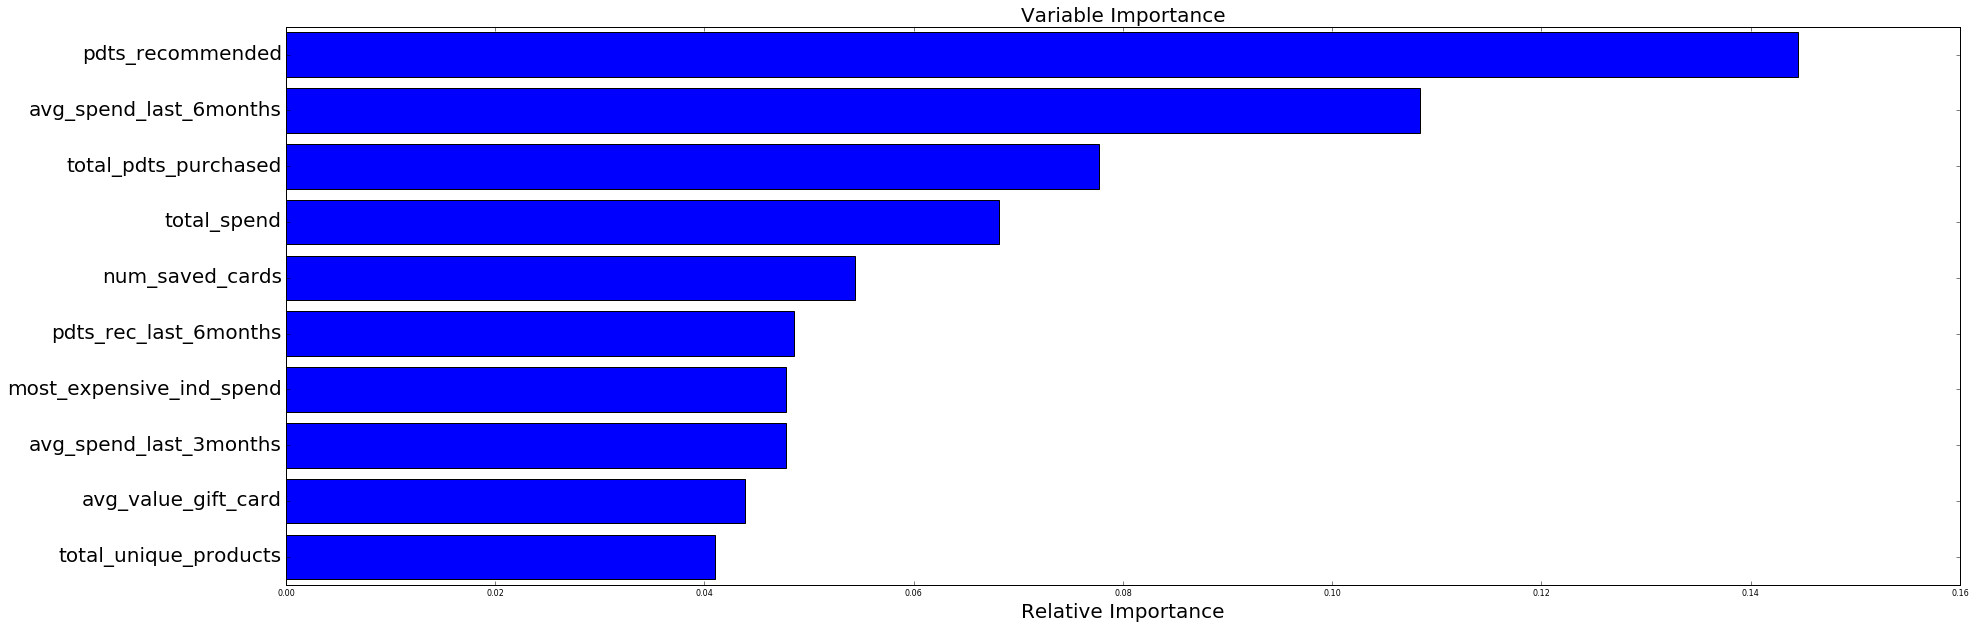

In [42]:
feature_importance = modelRF.feature_importances_
# make importances relative to max importance
#feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1][:10][::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(30, 10))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx],fontsize=20)
plt.xlabel('Relative Importance',fontsize=20)
plt.title('Variable Importance',fontsize=20)
plt.show()

In [43]:
pd.DataFrame(zip(X_train.columns, modelRF.feature_importances_)).sort([1], ascending =False).reset_index(drop=True)

/Users/raajaa/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0,1
0,pdts_recommended,1.445435e-01
1,avg_spend_last_6months,1.084085e-01
2,total_pdts_purchased,7.767970e-02
3,total_spend,6.818692e-02
4,num_saved_cards,5.440812e-02
5,pdts_rec_last_6months,4.859940e-02
6,most_expensive_ind_spend,4.776932e-02
7,avg_spend_last_3months,4.775273e-02
8,avg_value_gift_card,4.383793e-02
9,total_unique_products,4.098947e-02


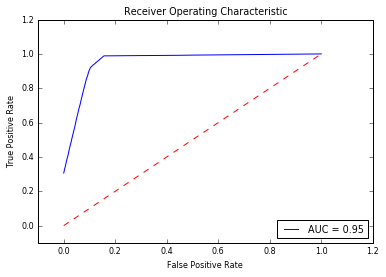

In [44]:
# generate evaluation metrics

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probsRF[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [45]:
RF_Acc = metrics.accuracy_score(y_test, predictedRF)
precRF = metrics.average_precision_score(y_test, predictedRF)
recallRF = metrics.recall_score(y_test, predictedRF)
f1RF = metrics.f1_score(y_test, predictedRF)

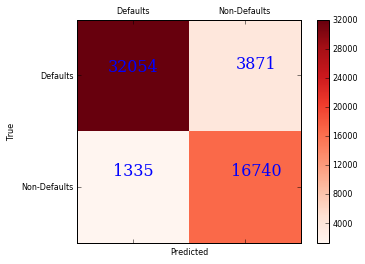

In [46]:
labels = ['Defaults', 'Non-Defaults']
cm = confusion_matrix(y_test, predictedRF)
#print pd.DataFrame(cm, index=['Defaults','Non-Defaults'],columns=['Defaults','Non-Defaults'])
print("\n")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(False, which='both')
cax = ax.matshow(cm,cmap=plt.cm.Reds)
plt.colorbar(cax)
font = {'family' : 'serif',
        'color'  : 'blue',
        'weight' : 'normal',
        'size'   : 16,
        }
plt.text(0.25, 0.79,cm[0][0], ha='center', va='center', transform=ax.transAxes,fontdict=font)
plt.text(0.8, 0.8,cm[0][1], ha='center', va='center', transform=ax.transAxes,fontdict=font)
plt.text(0.25, 0.32,cm[1][0], ha='center', va='center', transform=ax.transAxes,fontdict=font)
plt.text(0.8 ,0.32,cm[1][1], ha='center', va='center', transform=ax.transAxes,fontdict=font)
ax.set_xticklabels([' '] + labels)
ax.set_yticklabels([' '] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [47]:
resultsDF = resultsDF.append({'model': 'RF', 'accuracy': RF_Acc, 'precision': precRF , 'recall': recallRF, 'f1':f1RF}, ignore_index=True)

## XGBoost

In [63]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [64]:
parameters = {
        'n_estimators': [10,50,100,200],
        'max_depth': [5,10],
        'subsample': [0.9, 1.0],
        'colsample_bytree': [0.9, 1.0],
    }

In [54]:
%%time
gbm = xgb.XGBClassifier(learning_rate=0.05,nthread=4)
random_search = grid_search.RandomizedSearchCV(gbm, param_distributions=parameters,n_jobs=1, cv=2)
modelXGB = random_search.fit(X_train.as_matrix(),y_train.as_matrix())


CPU times: user 10min 22s, sys: 12.4 s, total: 10min 35s
Wall time: 11min 26s


In [55]:
report(random_search.grid_scores_)

Model with rank: 1
Mean validation score: 0.906 (std: 0.000)
Parameters: {'n_estimators': 50, 'subsample': 0.9, 'colsample_bytree': 1.0, 'max_depth': 5}

Model with rank: 2
Mean validation score: 0.906 (std: 0.000)
Parameters: {'n_estimators': 200, 'subsample': 1.0, 'colsample_bytree': 0.9, 'max_depth': 5}

Model with rank: 3
Mean validation score: 0.906 (std: 0.000)
Parameters: {'n_estimators': 50, 'subsample': 1.0, 'colsample_bytree': 0.9, 'max_depth': 10}



In [56]:
modelXGB.best_params_

{'colsample_bytree': 1.0, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.9}

In [57]:
%%time
modelXGB =  xgb.XGBClassifier(**modelXGB.best_params_)
modelXGB.fit(X_train.as_matrix(),y_train.as_matrix())

CPU times: user 18.8 s, sys: 175 ms, total: 19 s
Wall time: 19.2 s


In [58]:
## DANGER - DONT Re-RUN ; Use Pickle
XGB_hyper_opt = open('data/XGB_hyper_opt.pickle', 'wb')

# Pickle the list using the highest protocol available.
pickle.dump(modelXGB, XGB_hyper_opt, -1) ###

XGB_hyper_opt.close()

In [48]:
pkl_file_XGB = open('data/XGB_hyper_opt.pickle', 'rb')
modelXGB = pickle.load(pkl_file_XGB)
pkl_file_XGB.close()

In [49]:
predictedXGB = modelXGB.predict(X_test)
probXGB = modelXGB.predict_proba(X_test)

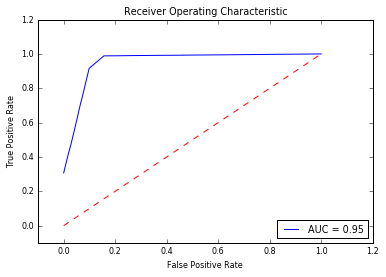

In [50]:
# generate evaluation metrics

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probXGB[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
XGB_Acc = metrics.accuracy_score(y_test,predictedXGB)
precXGB = metrics.average_precision_score(y_test, predictedXGB)
recallXGB = metrics.recall_score(y_test, predictedXGB)
f1XGB = metrics.f1_score(y_test, predictedXGB)

In [52]:
resultsDF = resultsDF.append({'model': 'XGBoost', 'accuracy': XGB_Acc, 'precision': precXGB , 'recall': recallXGB, 'f1':f1XGB}, ignore_index=True)

### Classifier 4

#### Hyper-Parameter optimization - using Randomized search

In [29]:
## Building parameter grid for RandomizedSearchCV ##

#Only one hidden layer
h1=range(4, X_train.shape[1]-4)

#Two hidden layers

h2 = [ ]  
for a in h1:
    for b in h1:
        h2.append((a,b))

#Three hidden layers

h3 = [ ]
for a in h1:
    for b in h1:
        for c in h1:
            h3.append((a,b,c))

#All lists combined
param=h1+h2+h3
#print param

In [30]:
clf= MLPClassifier(hidden_layer_sizes=(37, 33, 24))
clf.fit(X_train,y_train)



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(37, 33, 24), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [31]:
## DANGER - DONT Re-RUN ; Use Pickle
NN_MLP_hyper_opt = open('data/NN_MLP_hyper_opt.pickle', 'wb')

# Pickle the list using the highest protocol available.
pickle.dump(clf, NN_MLP_hyper_opt, -1) ###

NN_MLP_hyper_opt.close()

In [53]:
pkl_file_NN_MLP = open('data/NN_MLP_hyper_opt.pickle', 'rb')
clf = pickle.load(pkl_file_NN_MLP)
pkl_file_NN_MLP.close()

In [54]:

y_pred_test = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)

* #### ROC Curve and Area Under the Curve (AUC)


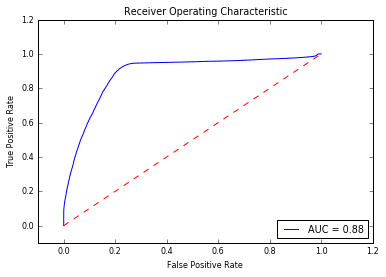

In [55]:
# generate evaluation metrics

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba_test[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

* #### Confusion Matrix

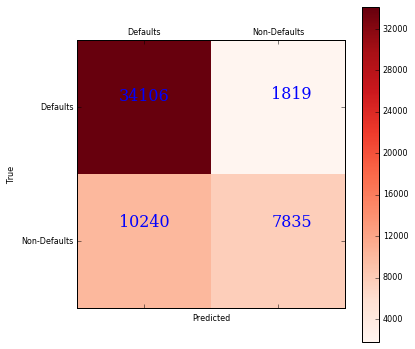

In [56]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Testing Data Confusion matrix Train based on best parameter by cross validation')
#print(cm)

labels = ['Defaults', 'Non-Defaults']
#print pd.DataFrame(cm, index=['Defaults','Non-Defaults'],columns=['Defaults','Non-Defaults'])
print("\n")
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.grid(False, which='both')
cax = ax.matshow(cm,cmap=plt.cm.Reds)
plt.colorbar(cax)
font = {'family' : 'serif',
        'color'  : 'blue',
        'weight' : 'normal',
        'size'   : 16,
        }
plt.text(0.25, 0.79,cm[0][0], ha='center', va='center', transform=ax.transAxes,fontdict=font)
plt.text(0.8, 0.8,cm[0][1], ha='center', va='center', transform=ax.transAxes,fontdict=font)
plt.text(0.25, 0.32,cm[1][0], ha='center', va='center', transform=ax.transAxes,fontdict=font)
plt.text(0.8 ,0.32,cm[1][1], ha='center', va='center', transform=ax.transAxes,fontdict=font)
ax.set_xticklabels([' '] + labels)
ax.set_yticklabels([' '] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [57]:
#Classifier performance
NN_MLP_Acc = metrics.accuracy_score(y_test,y_pred_test)
precNN_MLP = metrics.average_precision_score(y_test, y_pred_test)
recallNN_MLP = metrics.recall_score(y_test, y_pred_test)
f1NN_MLP = metrics.f1_score(y_test, y_pred_test)
print NN_MLP_Acc

0.776685185185


In [58]:
resultsDF = resultsDF.append({'model': 'Classifier 4', 'accuracy': NN_MLP_Acc, 'precision': precNN_MLP , 'recall': recallNN_MLP, 'f1':f1NN_MLP}, ignore_index=True)

### Model Performace - Summary 

In [59]:
resultsDF

,model,precision,recall,f1,accuracy
0,Classifier 1,0.869978,0.935934,0.852414,0.891519
1,RF,0.881525,0.926141,0.865429,0.903593
2,XGBoost,0.883831,0.915629,0.867287,0.906204
3,Classifier 4,0.717341,0.433472,0.565112,0.776685


### Testing the classifier

In [76]:
input = dfTEMP.iloc[[1]]
out = y.iloc[[1]]

In [77]:
input

,Unnamed: 0,app_transaction_count,avg_pdt_returns,avg_pdts_per_trans,avg_spend,avg_spend_last_3months,avg_spend_last_6months,avg_spend_last_month,avg_trans_per_month,avg_trans_per_month.1,...,total_spend,total_transactions,total_unique_products,total_value_gift_card,unique_mob_devices,unique_mob_os,unique_pdts_lst_3months,unique_pdts_lst_6months,unique_pdts_lst_month,wallet_flag
19817,19817,2,7,7,20,21,20,0,1,1,...,733,6,31,21,4,5,13,31,0,1


In [78]:
# Capture the results accross models
cols = ['model','Prediction','Probablity to Default(%)']
outcomeDF = pd.DataFrame(columns=cols)

In [79]:
modelLogit.predict_proba(input)[0][1]

9.372940197115682e-30

In [80]:
# Evaluate Logistic Regression Score
outcomeDF = outcomeDF.append({'model': 'Logit','Prediction': bool(modelLogit.predict(input)[0]), 'Probablity to Default(%)': modelLogit.predict_proba(input)[0][1]}, ignore_index=True)

# Evaluate Logistic Regression Score
outcomeDF = outcomeDF.append({'model': 'Random Forest','Prediction': bool(modelRF.predict(input)[0]), 'Probablity to Default(%)': modelRF.predict_proba(input)[0][1]}, ignore_index=True)


In [81]:
outcomeDF

,model,Prediction,Probablity to Default(%)
0,Logit,False,9.372940e-30
1,Random Forest,False,3.294252e-01
